# Euler method for solving second-order differential equations

Similar to the first order the second-order differential equations can also solved using the Euler method.

Previously we got,
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1})$$

Replacing $f(x_n)$ with its derivative,
$$f'(x_n) = f'(x_{n-1}) + h \cdot f''(x_{n-1})$$

Putting this equation into the previous one,
$$f(x_n) = f(x_{n-1}) + h \left[ f'(x_{n-1}) + h \cdot f''(x_{n-1}) \right]$$
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1}) + h^2 \cdot f''(x_{n-1})$$

Again we can also ge here from the Taylor expansion, but this time we have to considee upto the third term,
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1}) + h^2 \cdot f''(x_{n-1})$$

But while writing the code we will first eveluate the first derivaitve using the euler method and then again use the first derivetive to evalute the function itsef.
$$f(x_n) = f(x_{n-1}) + h \cdot f'(x_{n-1})$$
$$f'(x_n) = f'(x_{n-1}) + h \cdot f''(x_{n-1})$$

For this we would not only have to provide the initial value of $f(x)$, but also the intial value of $f'(x)$ both at $x= x_0$, which will be starting point for the Euler algorithm when solving for $f(X)$ and $f'()$. This would also eliminate the two constants we would have got from solving the second-order differential equations. 

## Code

In [1]:
from numpy import cos, empty, exp, pi, sin
from matplotlib import pyplot as plt

# Default configuaration for matplotlib
plt.style.use(['science', 'ieee'])
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
# Function to generate `n` evenly spaced points between limits `a` and `b`
def generate_points(a, b, h):

    # Calculating the number of points
    n = int(((b - a) / h) + 1)

    # Creating an empty array to store the points
    points = empty(n)

    # Generating the points
    for i in range(n):
        points[i] = a
        a += h

    return points


In [3]:
def solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h):

    # Generating equispaced points
    x = generate_points(x_i, x_f, h)

    # Creating two arrays to store `y_prime` and `y`
    y_prime = empty(x.size)
    y = empty(x.size)

    # Initialising `y_prime` and `y` with initial values
    y_prime[0] = y_prime_i
    y[0] = y_i

    # Evaluating the function `y_prime` and `y` at the remaining points
    for i in range(1, x.size):
        y_prime[i] = y_prime[i-1] + h * \
            y_prime_prime(x[i], y[i-1], y_prime[i-1])
        y[i] = y[i-1] + h * y_prime[i-1]

    return y


## Examples

### $$\frac{d^2y}{dx^2} = y$$
$$y = e^{mx} + e^{-nx}$$

In [4]:
def y_prime_prime(x, y, y_prime):
    return y


x_i = 0
x_f = 5
y_i = 1
y_prime_i = 1
h = 0.1


In [5]:
points = generate_points(x_i, x_f, h)

y_euler = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)
y_analytical = exp(points) - 1


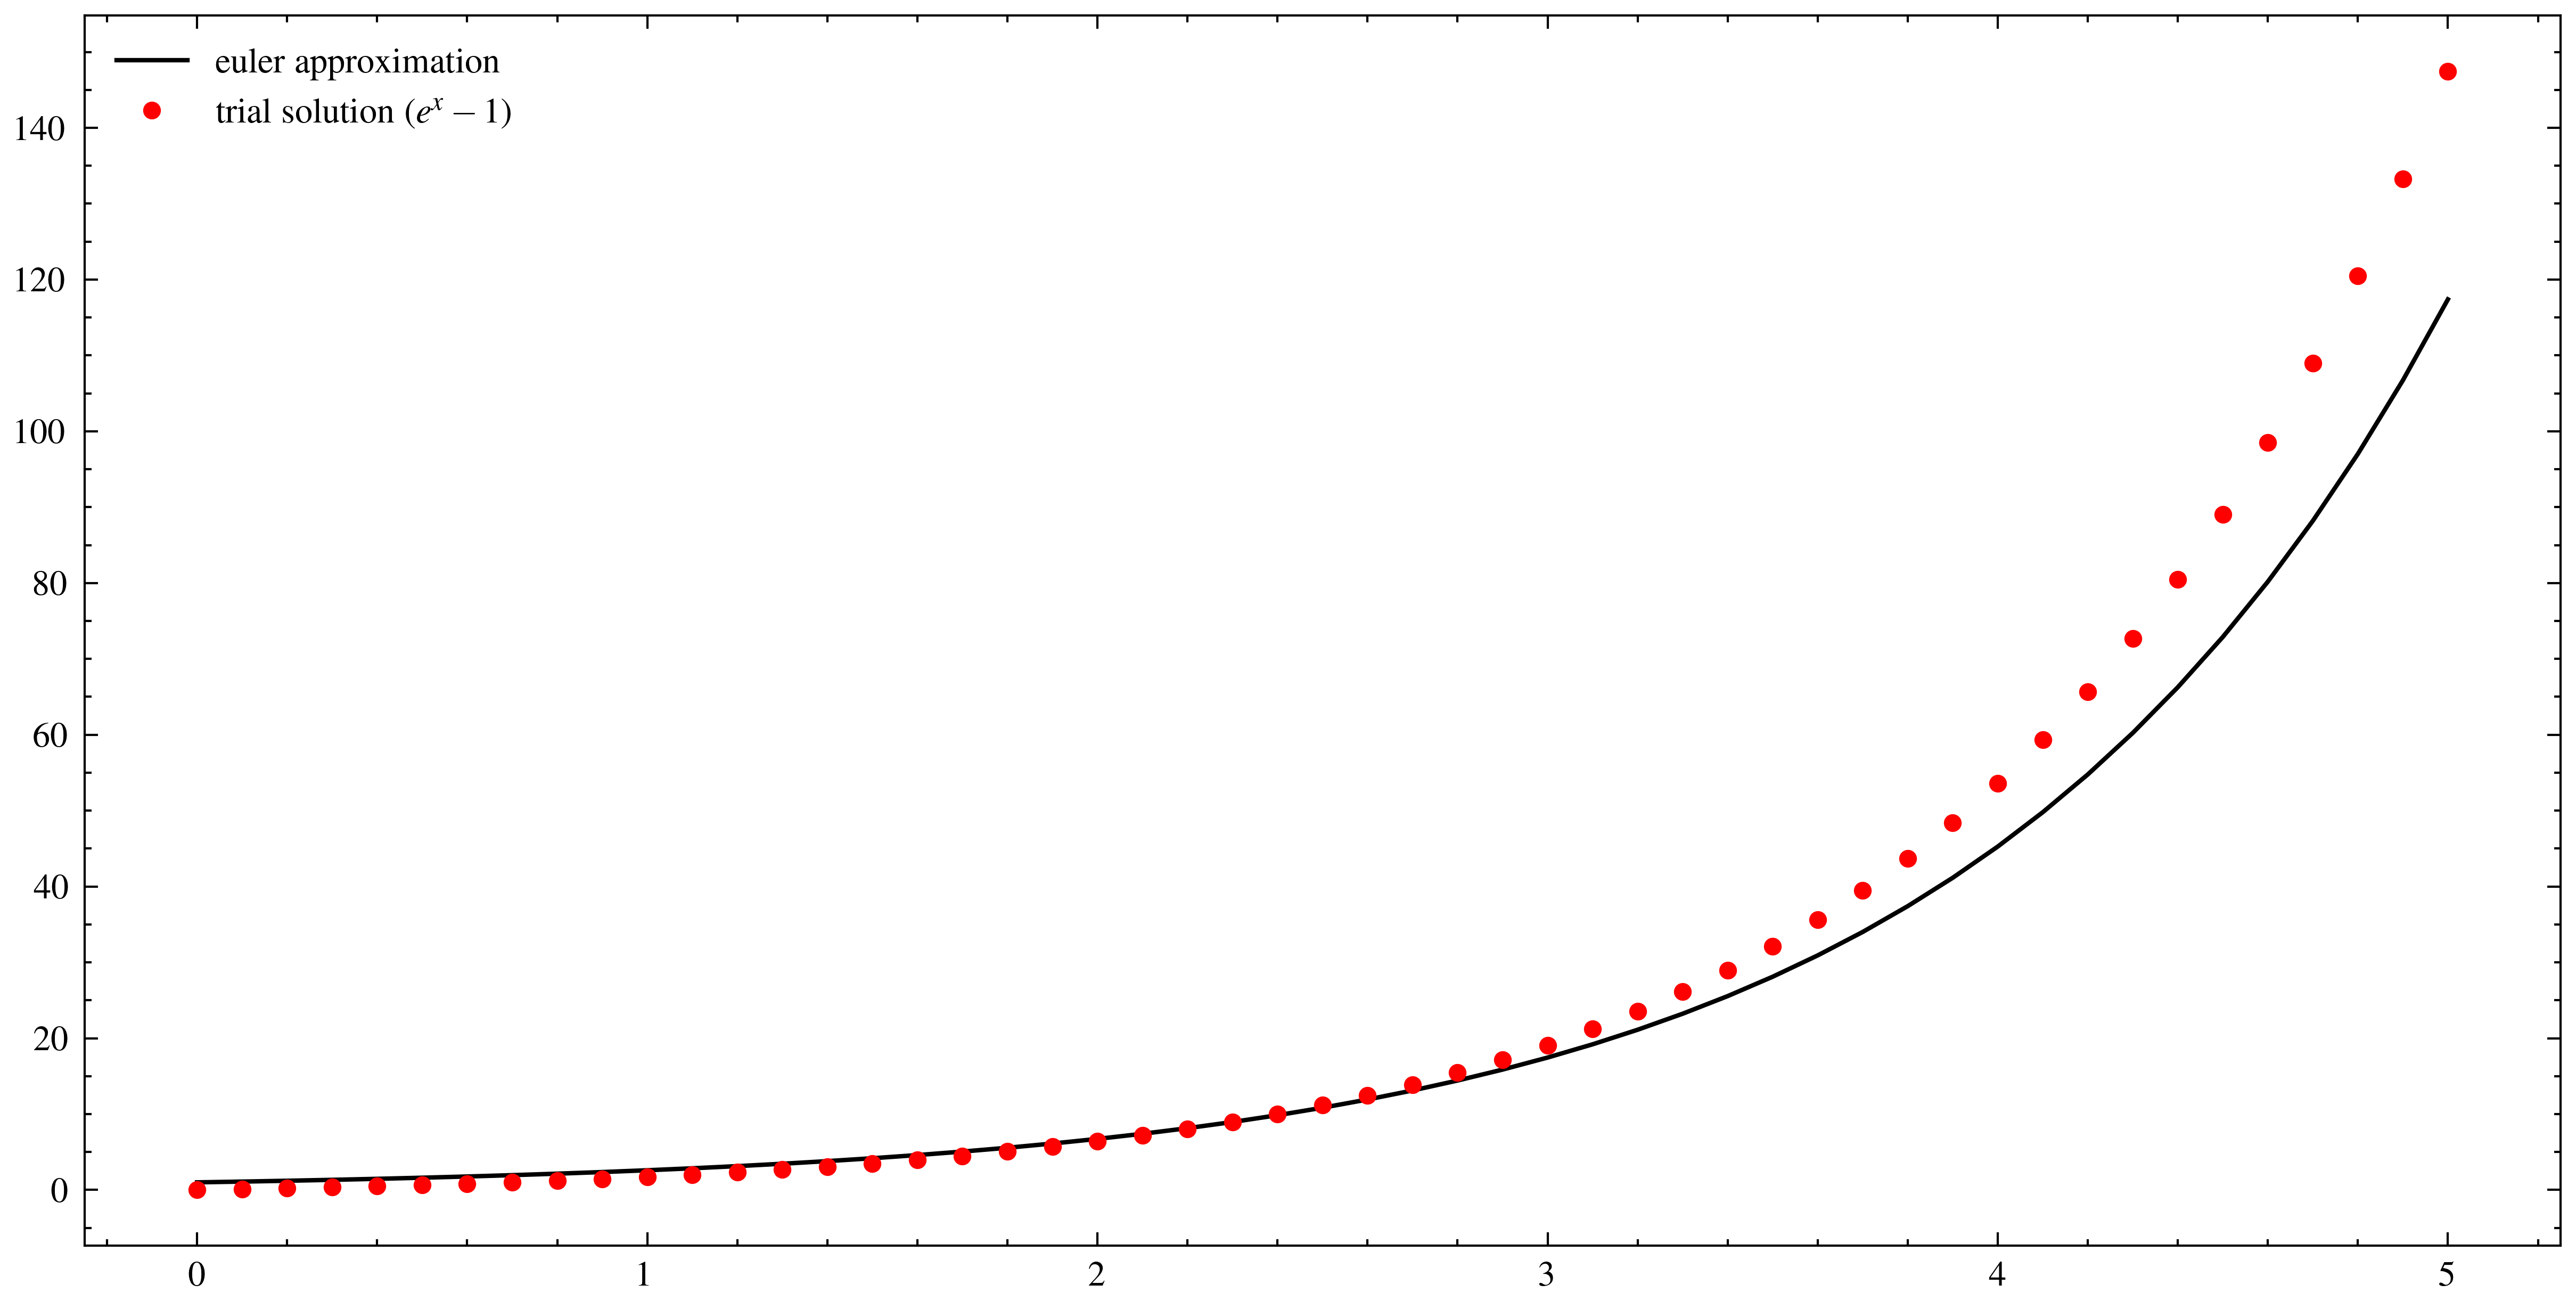

In [6]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_analytical, '.', label="trial solution ($e^x - 1$)")
plt.legend()
plt.show()


### $$\frac{d^2y}{dx^2} = -y$$
$$y = cos(mx) + sin(nx)$$

In [7]:
def y_prime_prime(x, y, y_prime):
    return -y


x_i = 0
x_f = 2 * pi
y_i = 0
y_prime_i = 1
h = 0.1


In [8]:
points = generate_points(x_i, x_f, h)

y_euler = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)
y_analytical = sin(points)


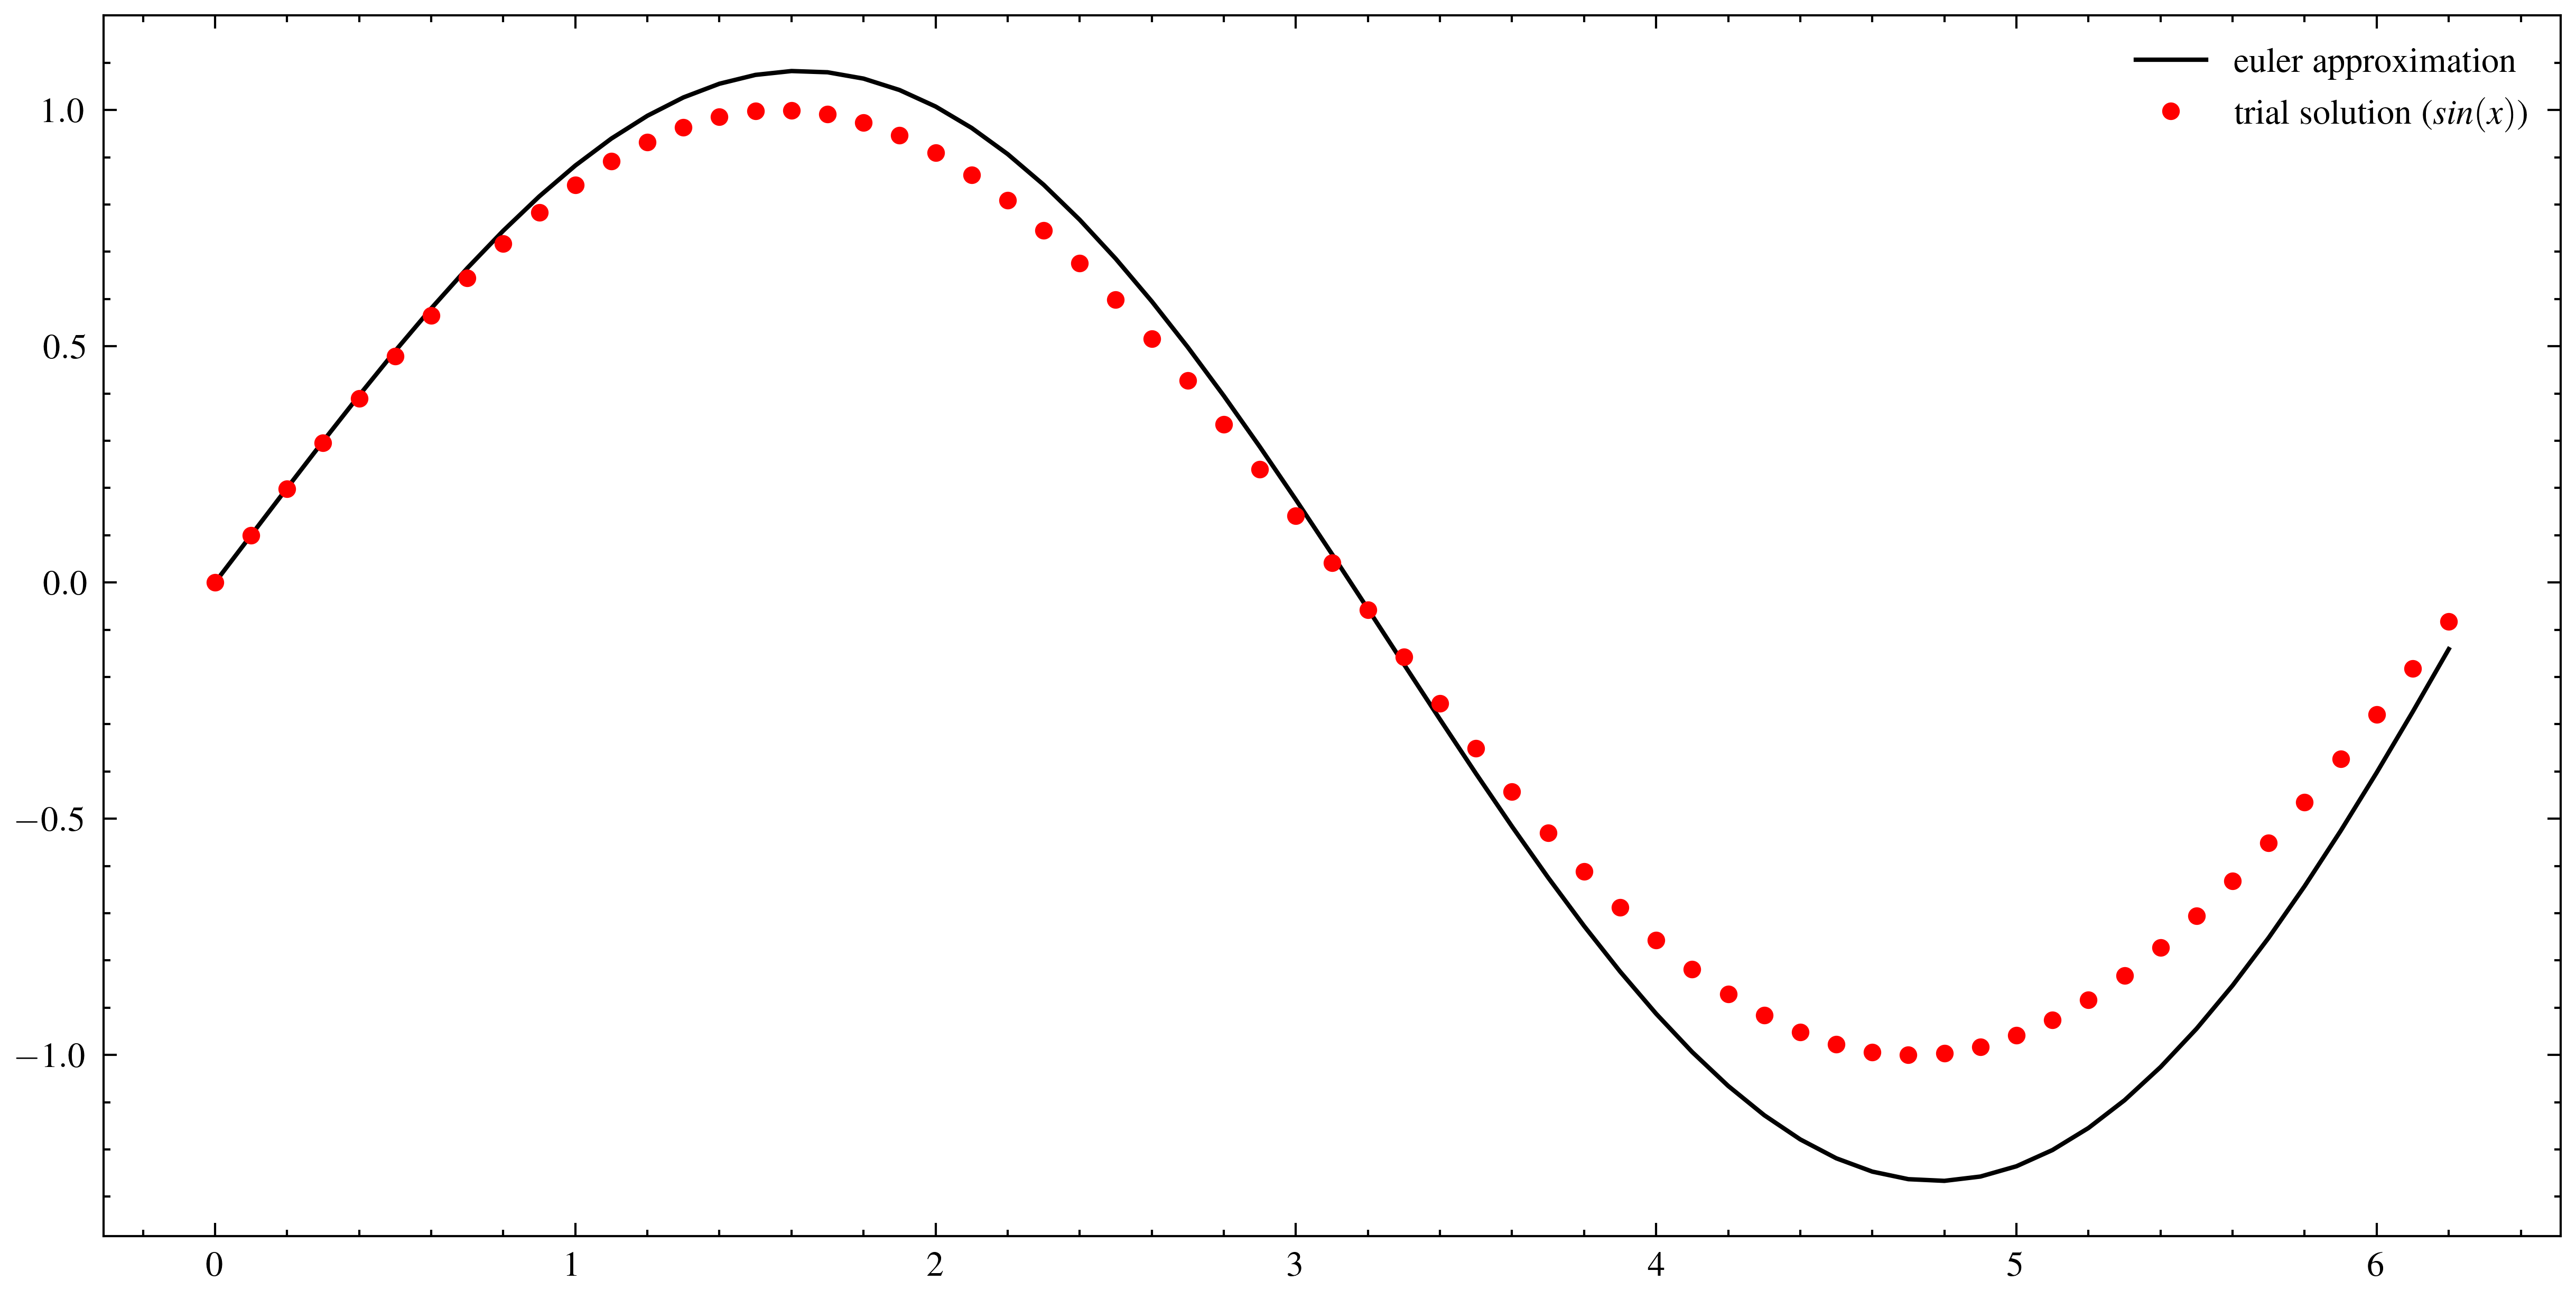

In [9]:
plt.plot(points, y_euler, label="euler approximation")
plt.plot(points, y_analytical, '.', label="trial solution ($sin(x)$)")
plt.legend()
plt.show()


## Real world physics problems

### Harmonic oscillator

The equation of motion for an ideal harmonic oscillator is,
$$m \frac{d^2x}{dt^2} = -kx$$
$$m \ddot x = -kx$$

In presence of the force of friction proprtional to the velocity ($\dot x$) of the harmonic oscillator the equation becomes,
$$m \ddot x = -kx - b \dot x$$

Which can further be expressed in the standard form,
$$\ddot x + 2 \gamma \dot x + \omega^2 x = 0$$

where, $\gamma = b/2m$ and $\omega^2 = k/m$.

#### Undamped harmonic oscillator

$$\gamma = 0$$

In [10]:
gamma = 0
omega = 2


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y


x_i = 0
x_f = 5 * pi
y_i = 0
y_prime_i = 1
h = 0.001


In [11]:
points = generate_points(x_i, x_f, h)

y_undamp = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)


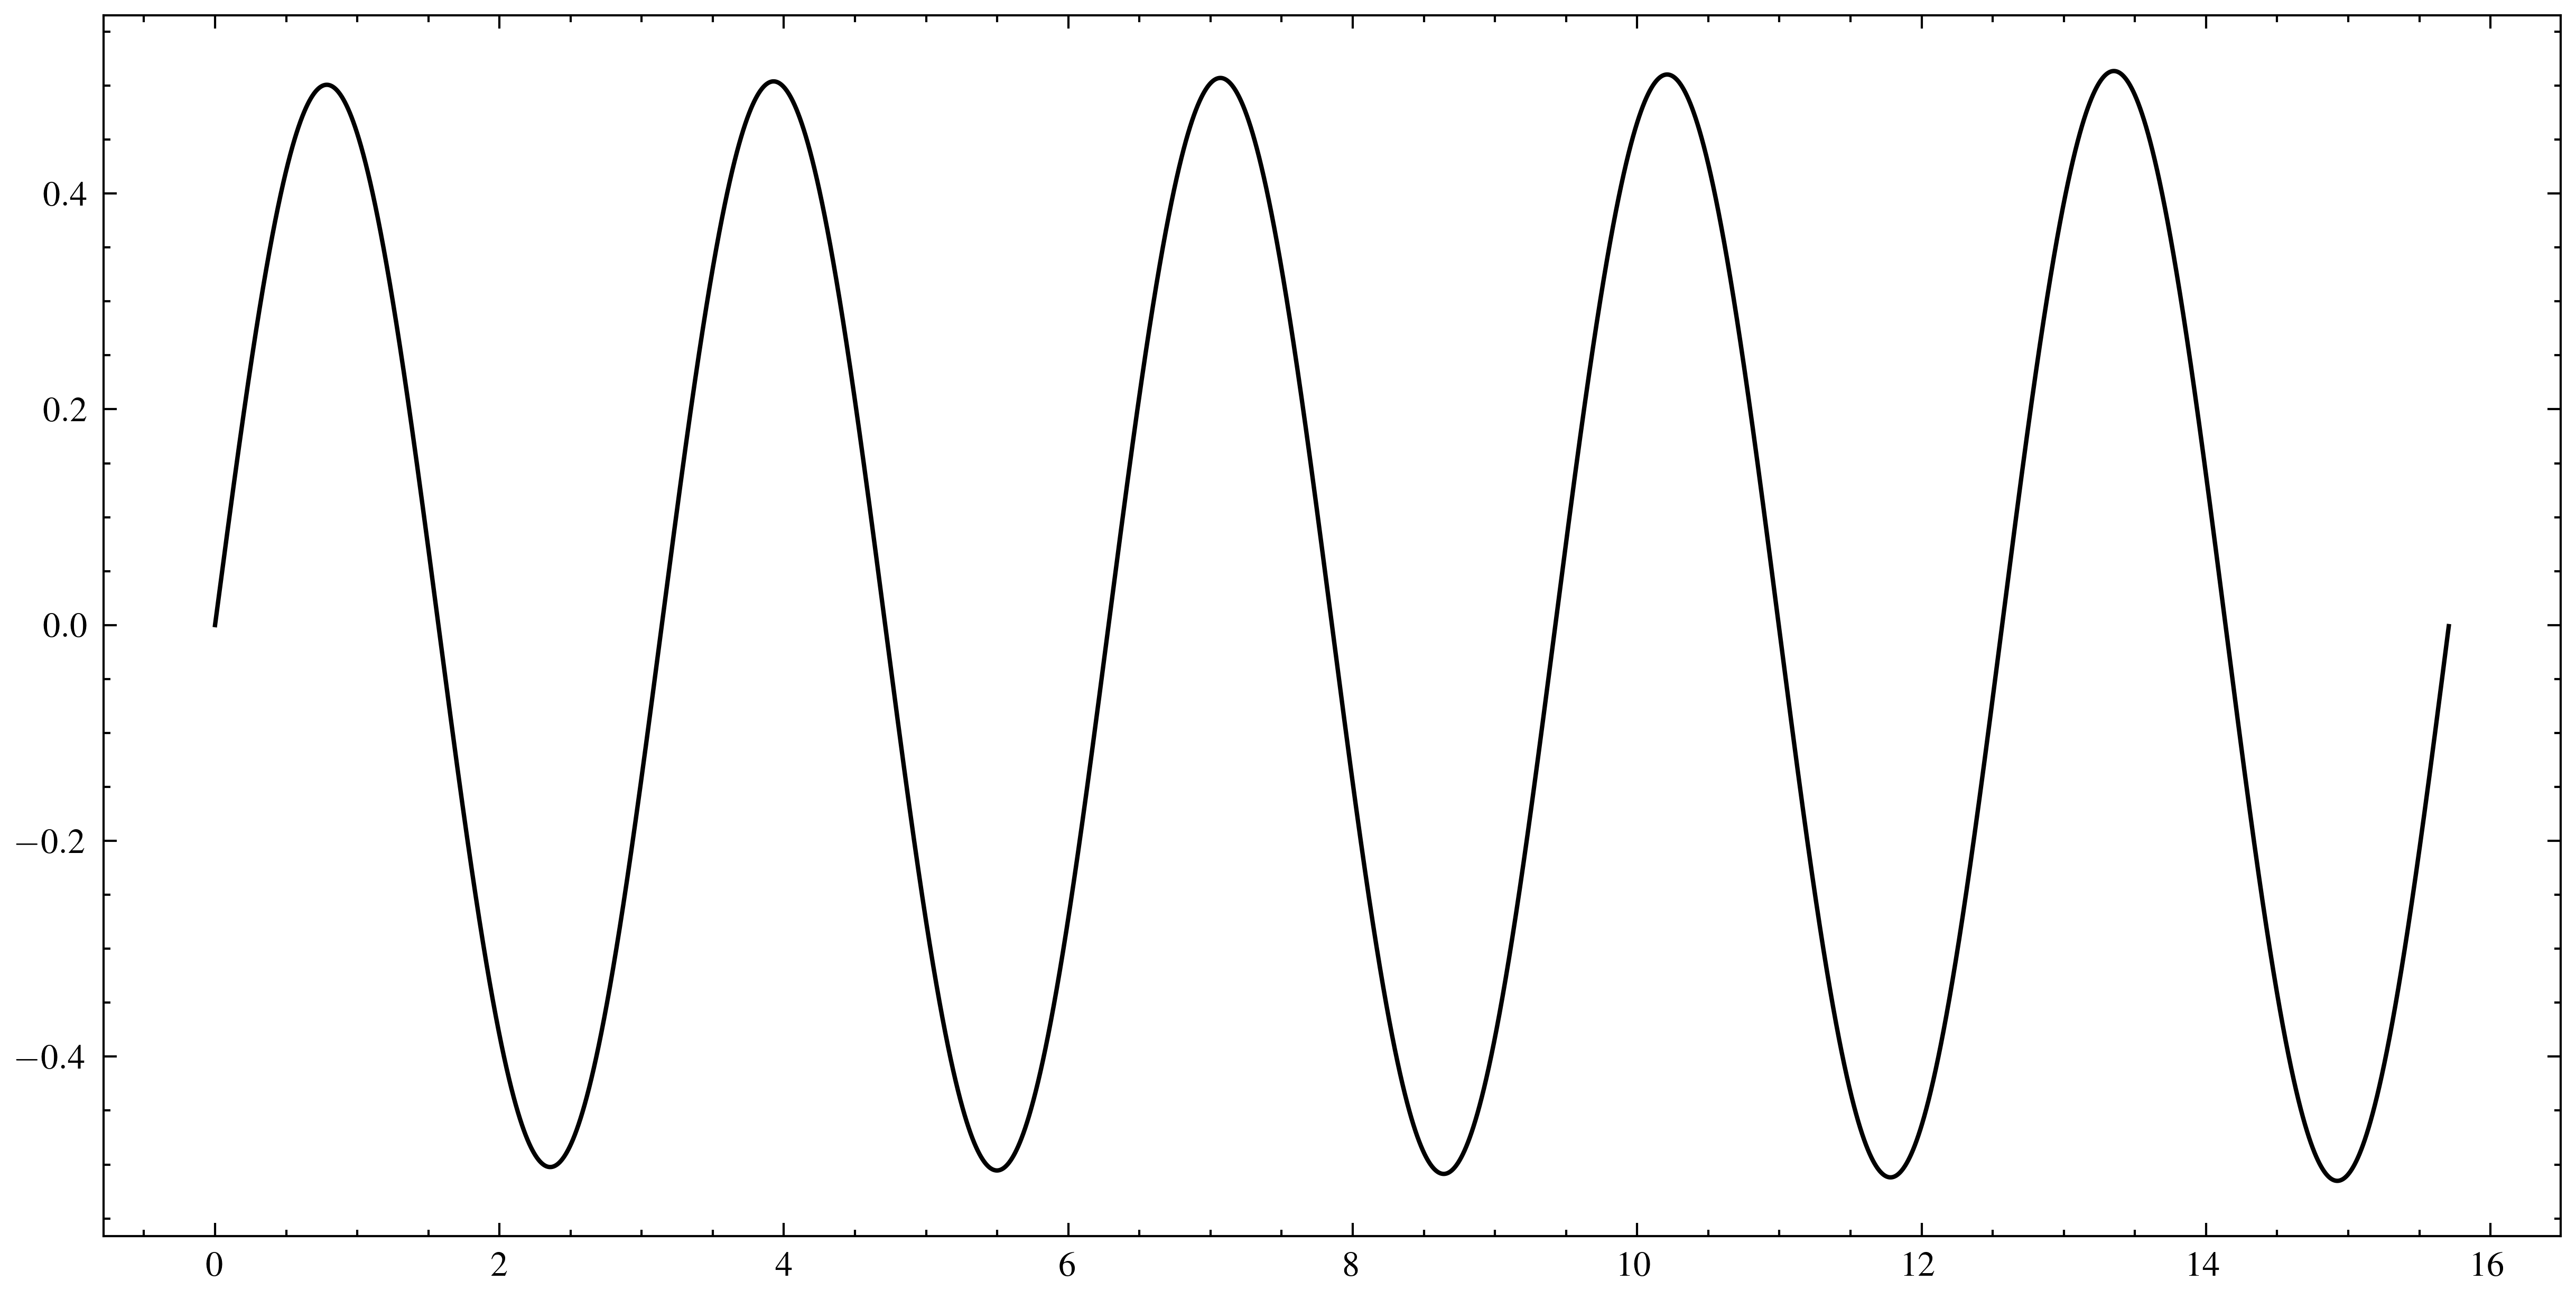

In [12]:
plt.plot(points, y_undamp)
plt.show()


#### Under-damped harmonic oscillator

$$\gamma^2 < \omega^2$$

In [13]:
gamma = 0.5
omega = 5


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y


x_i = 0
x_f = 5 * pi
y_i = 10
y_prime_i = 1
h = 0.001


In [14]:
points = generate_points(x_i, x_f, h)

y_under = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)


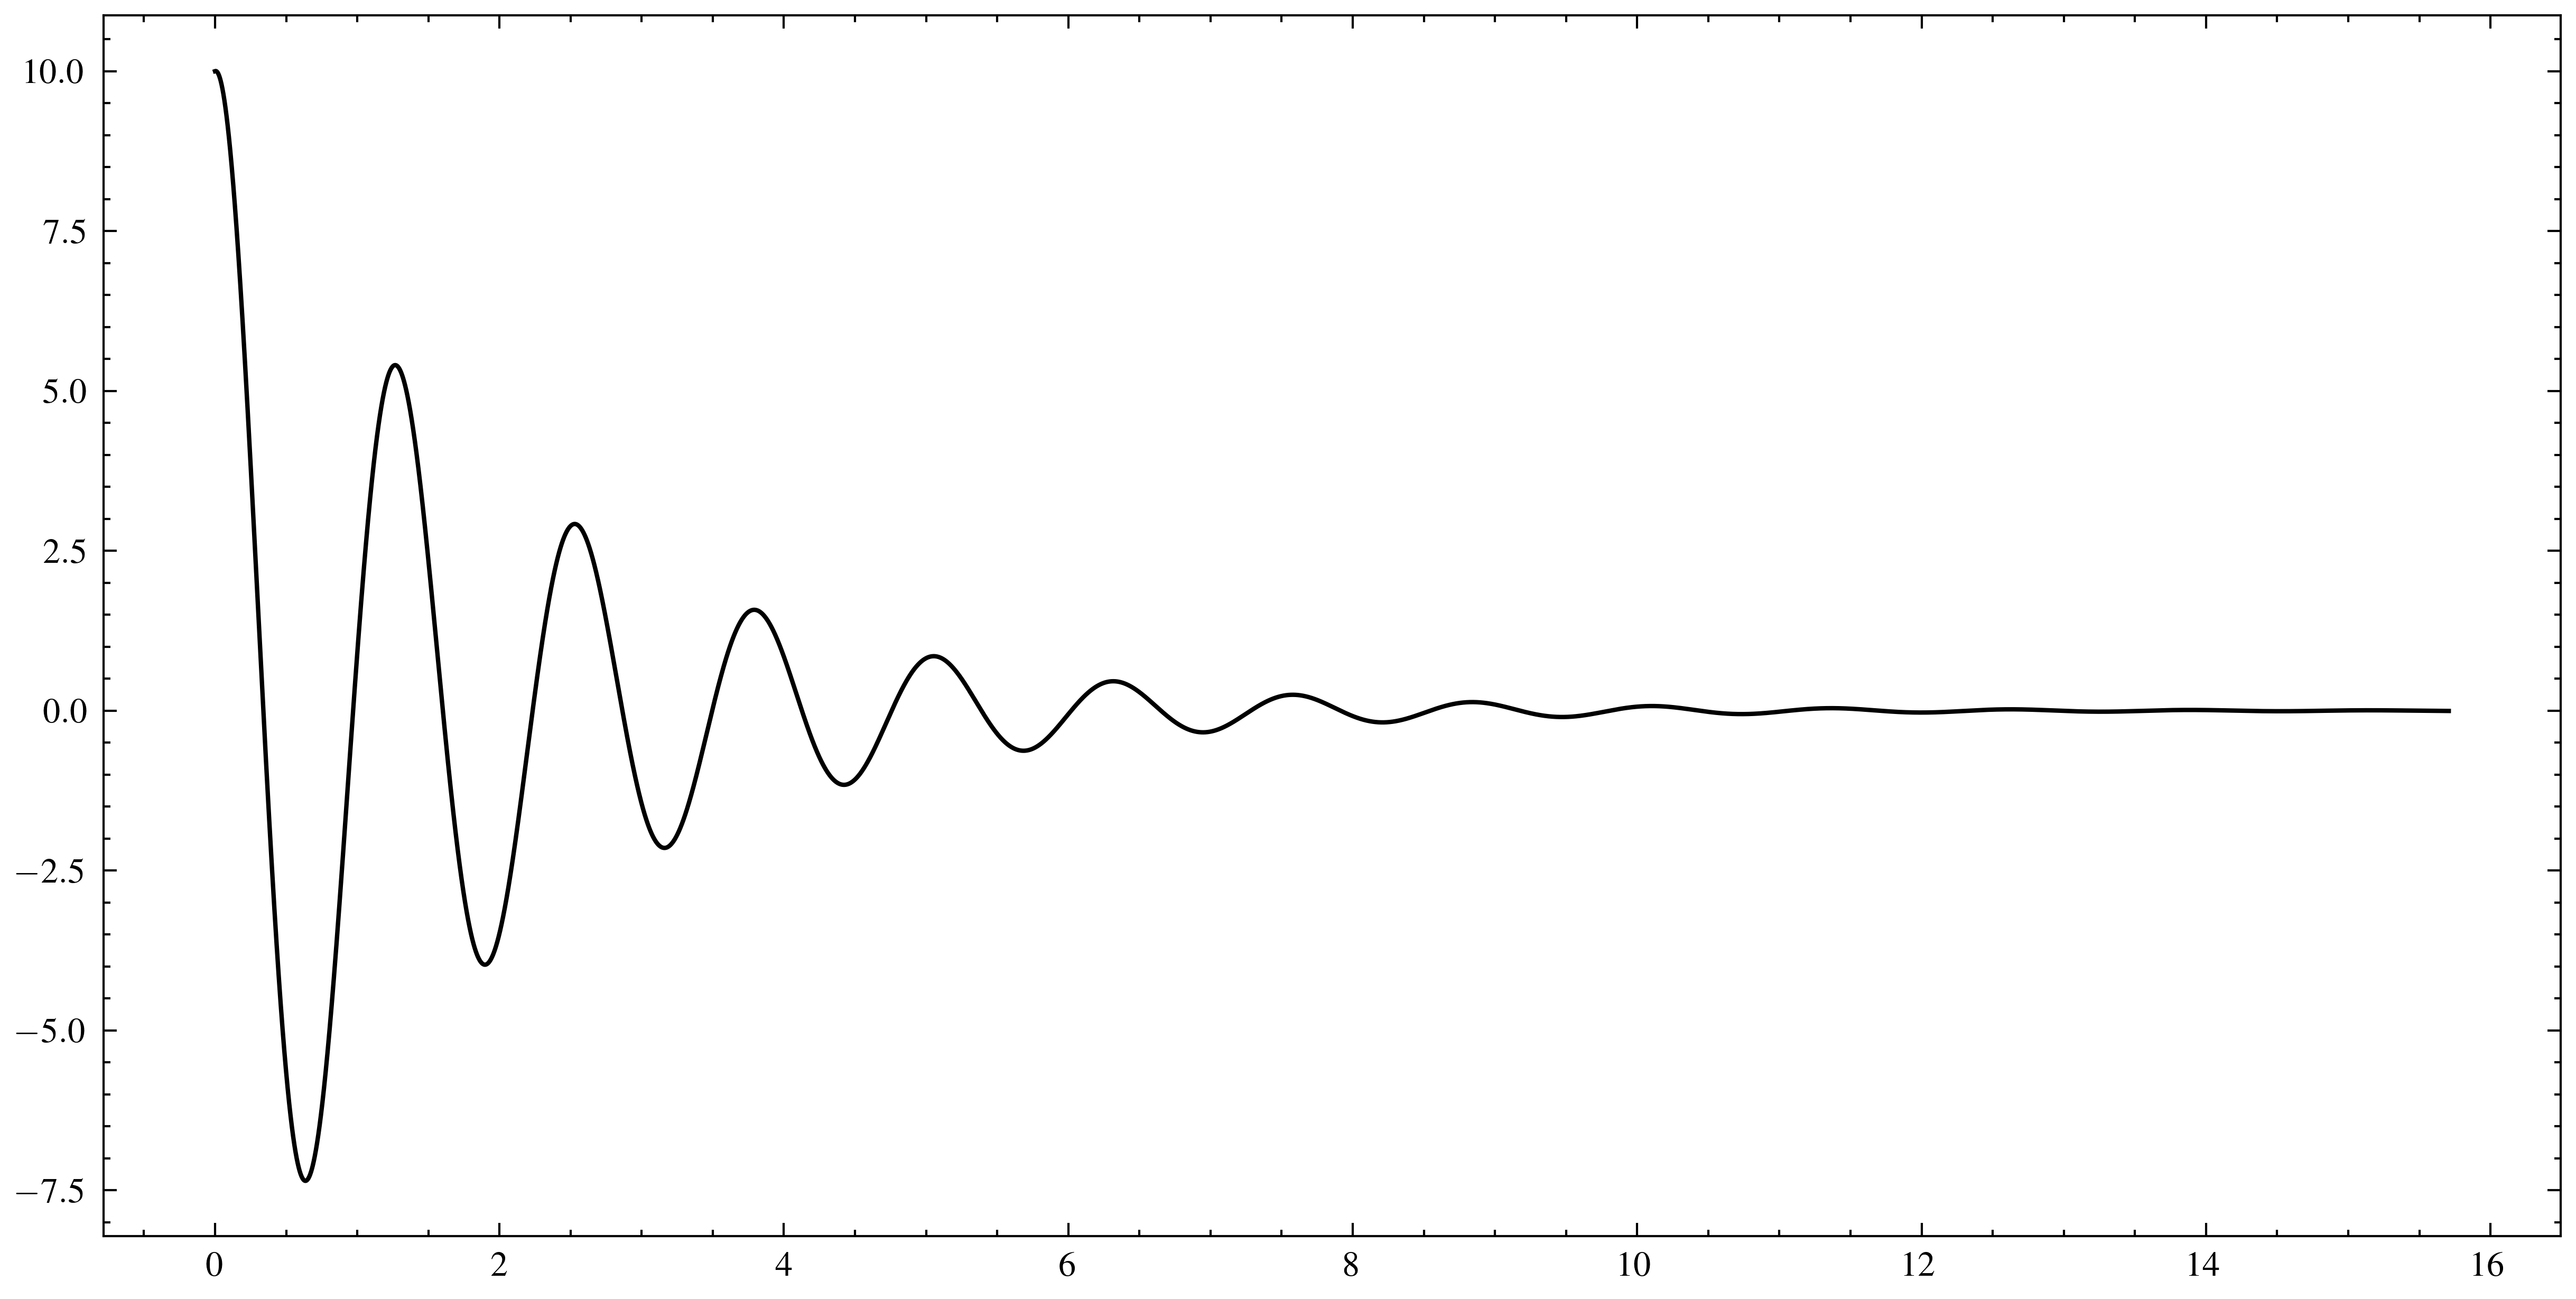

In [15]:
plt.plot(points, y_under)
plt.show()


#### Critically-damped harmonic oscillator $$\gamma^2 = \omega^2$$

In [16]:
gamma = 2
omega = 2


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y


x_i = 0
x_f = 5 * pi
y_i = 10
y_prime_i = 1
h = 0.001


In [17]:
points = generate_points(x_i, x_f, h)

y_critical = solve_euler(
    y_prime_prime, x_i, x_f, y_i, y_prime_i, h)


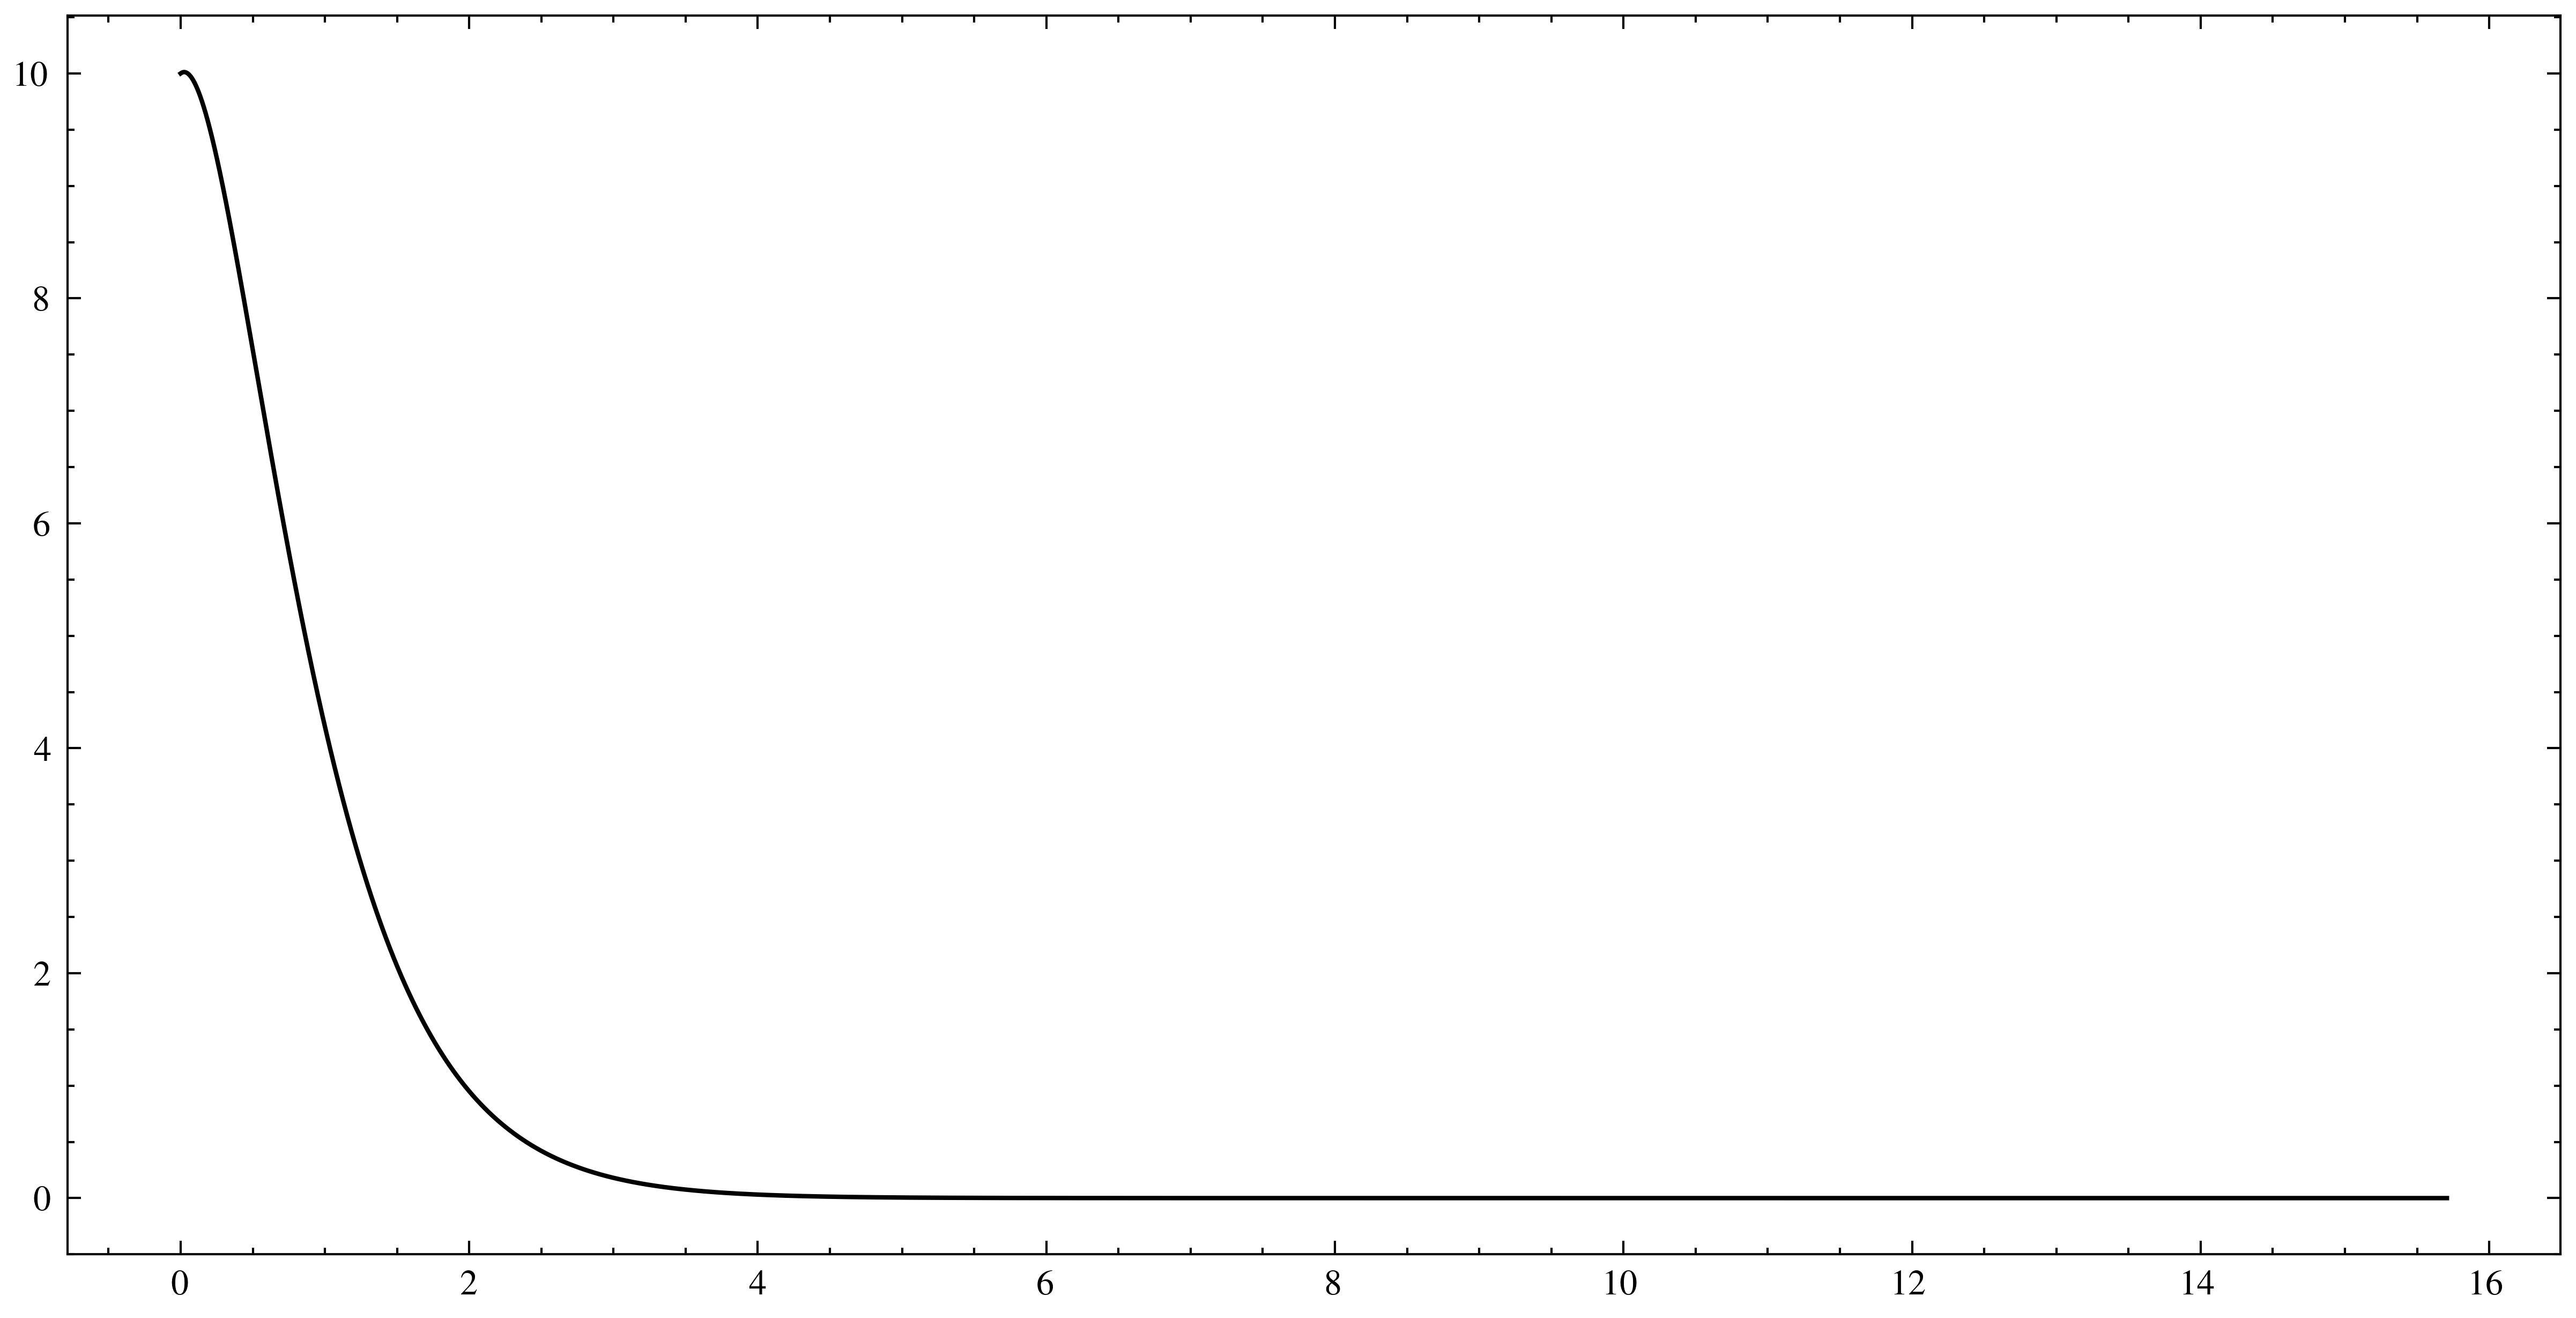

In [18]:
plt.plot(points, y_critical)
plt.show()


#### Over-damped harmonic oscillator

$$\gamma^2 > \omega^2$$

In [19]:
gamma = 3
omega = 1


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y


x_i = 0
x_f = 5 * pi
y_i = 10
y_prime_i = 1
h = 0.001


In [20]:
points = generate_points(x_i, x_f, h)

y_over = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)


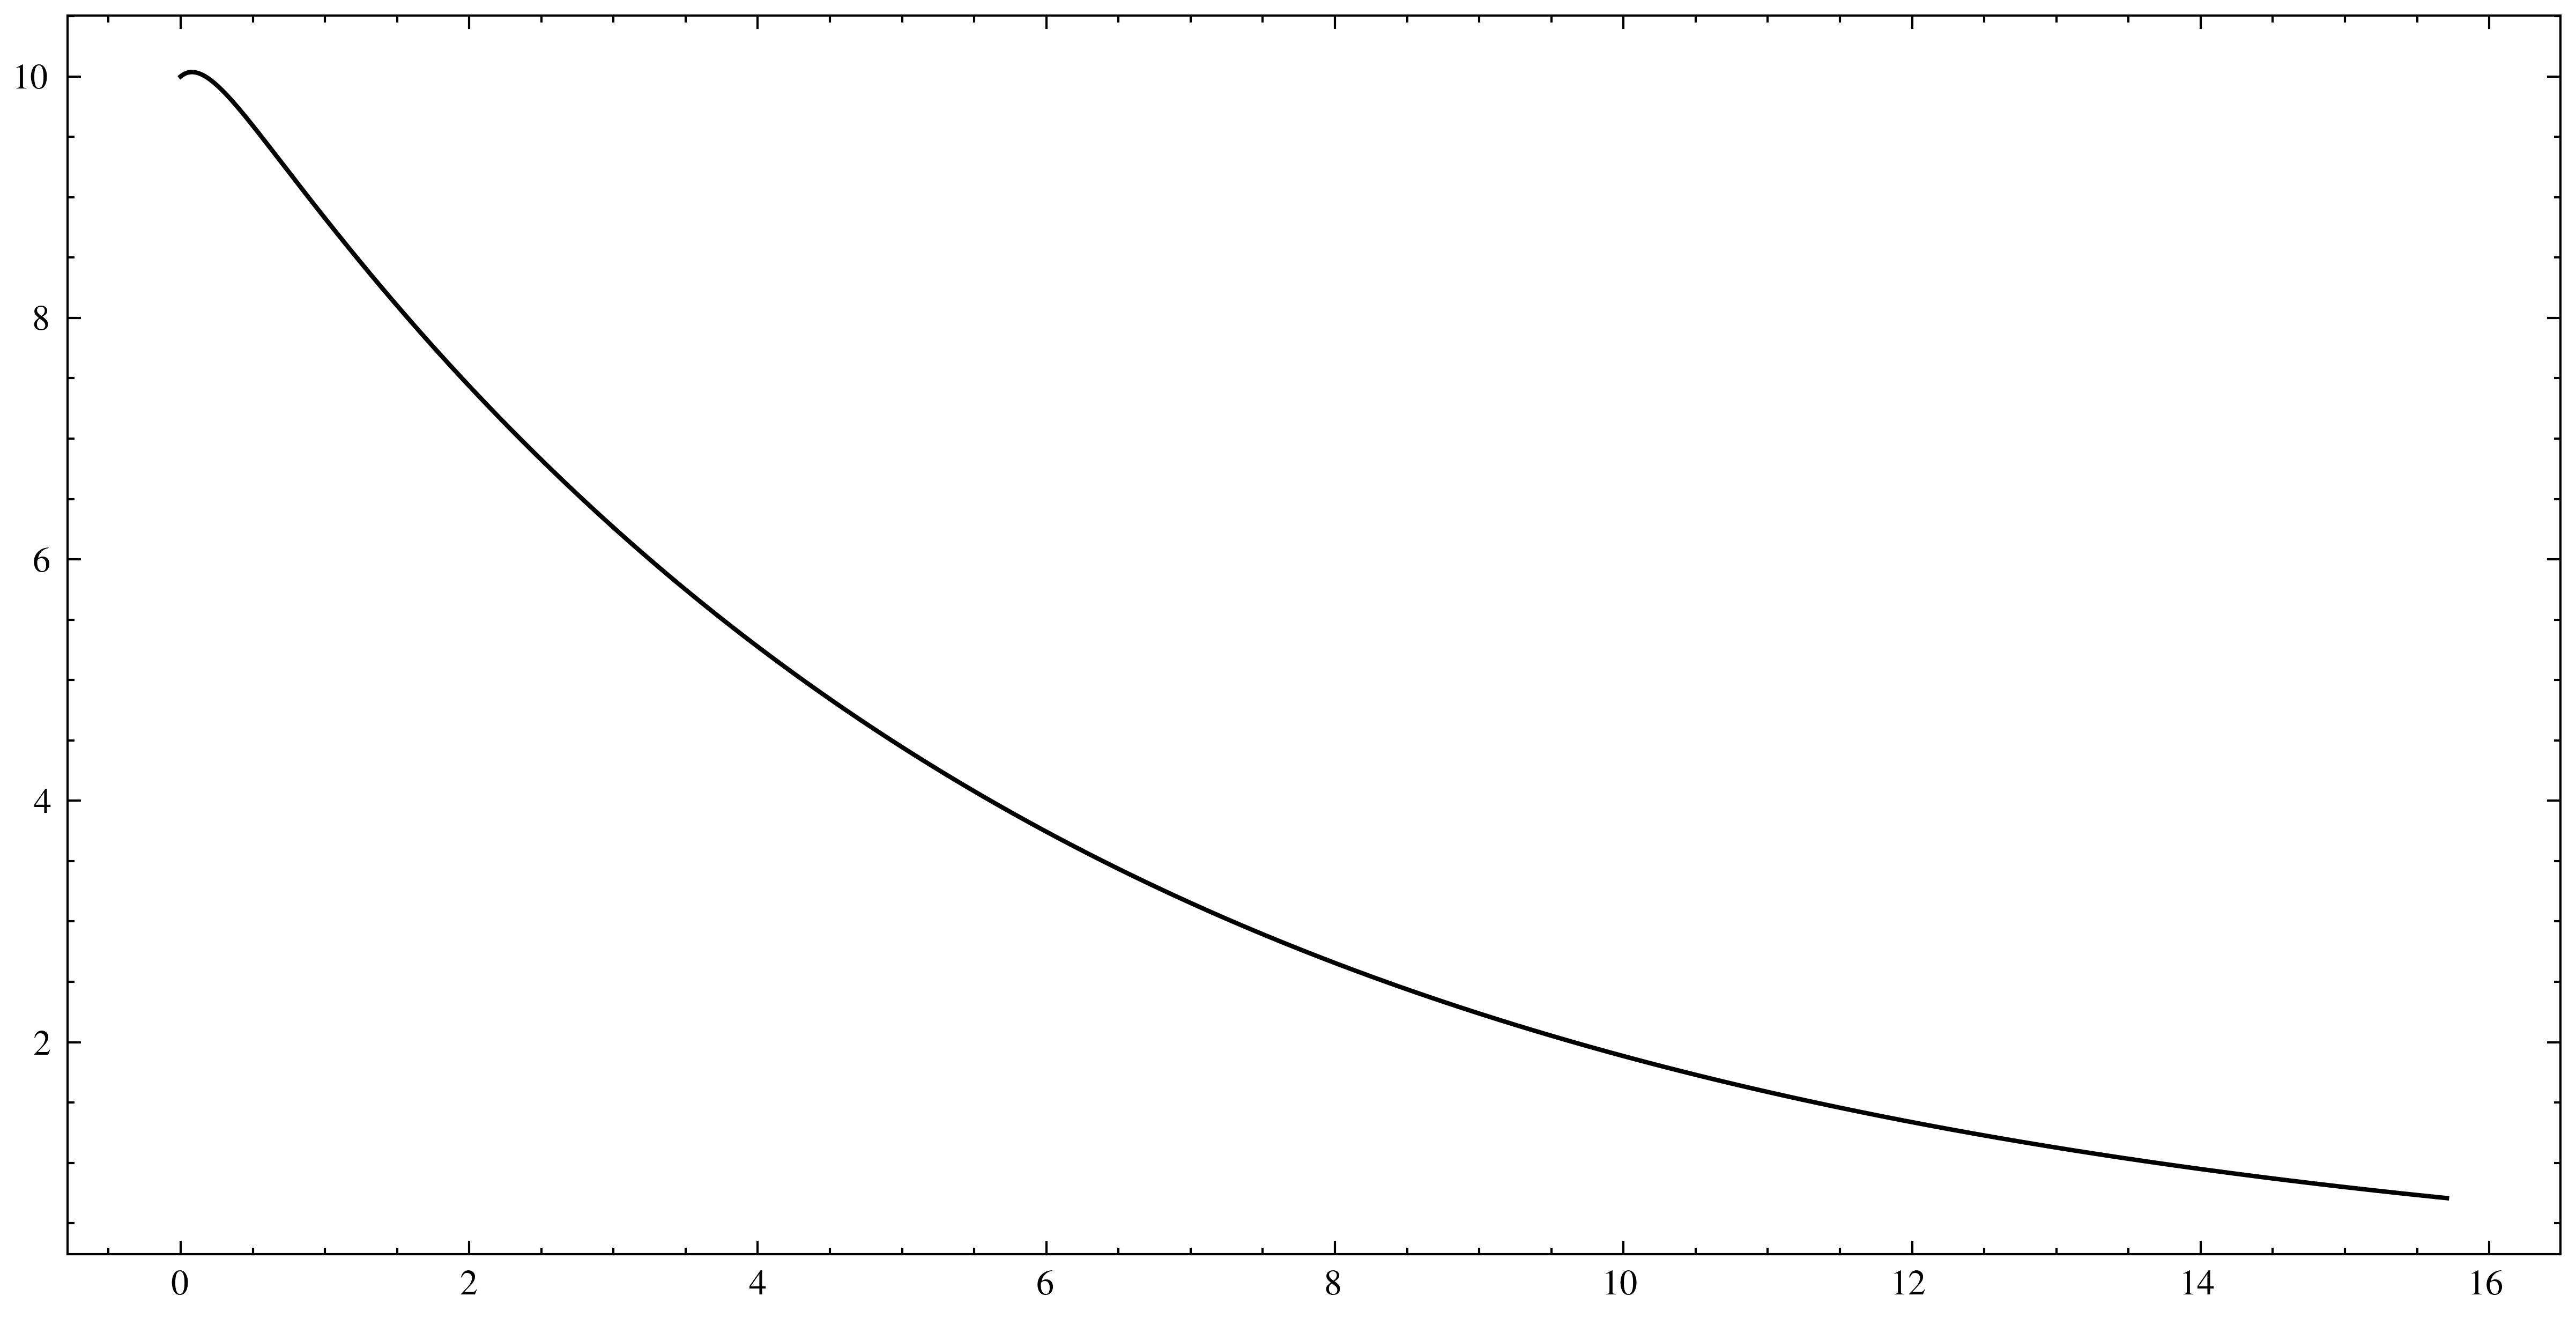

In [21]:
plt.plot(points, y_over)
plt.show()


### Comparing different types of damped oscillations

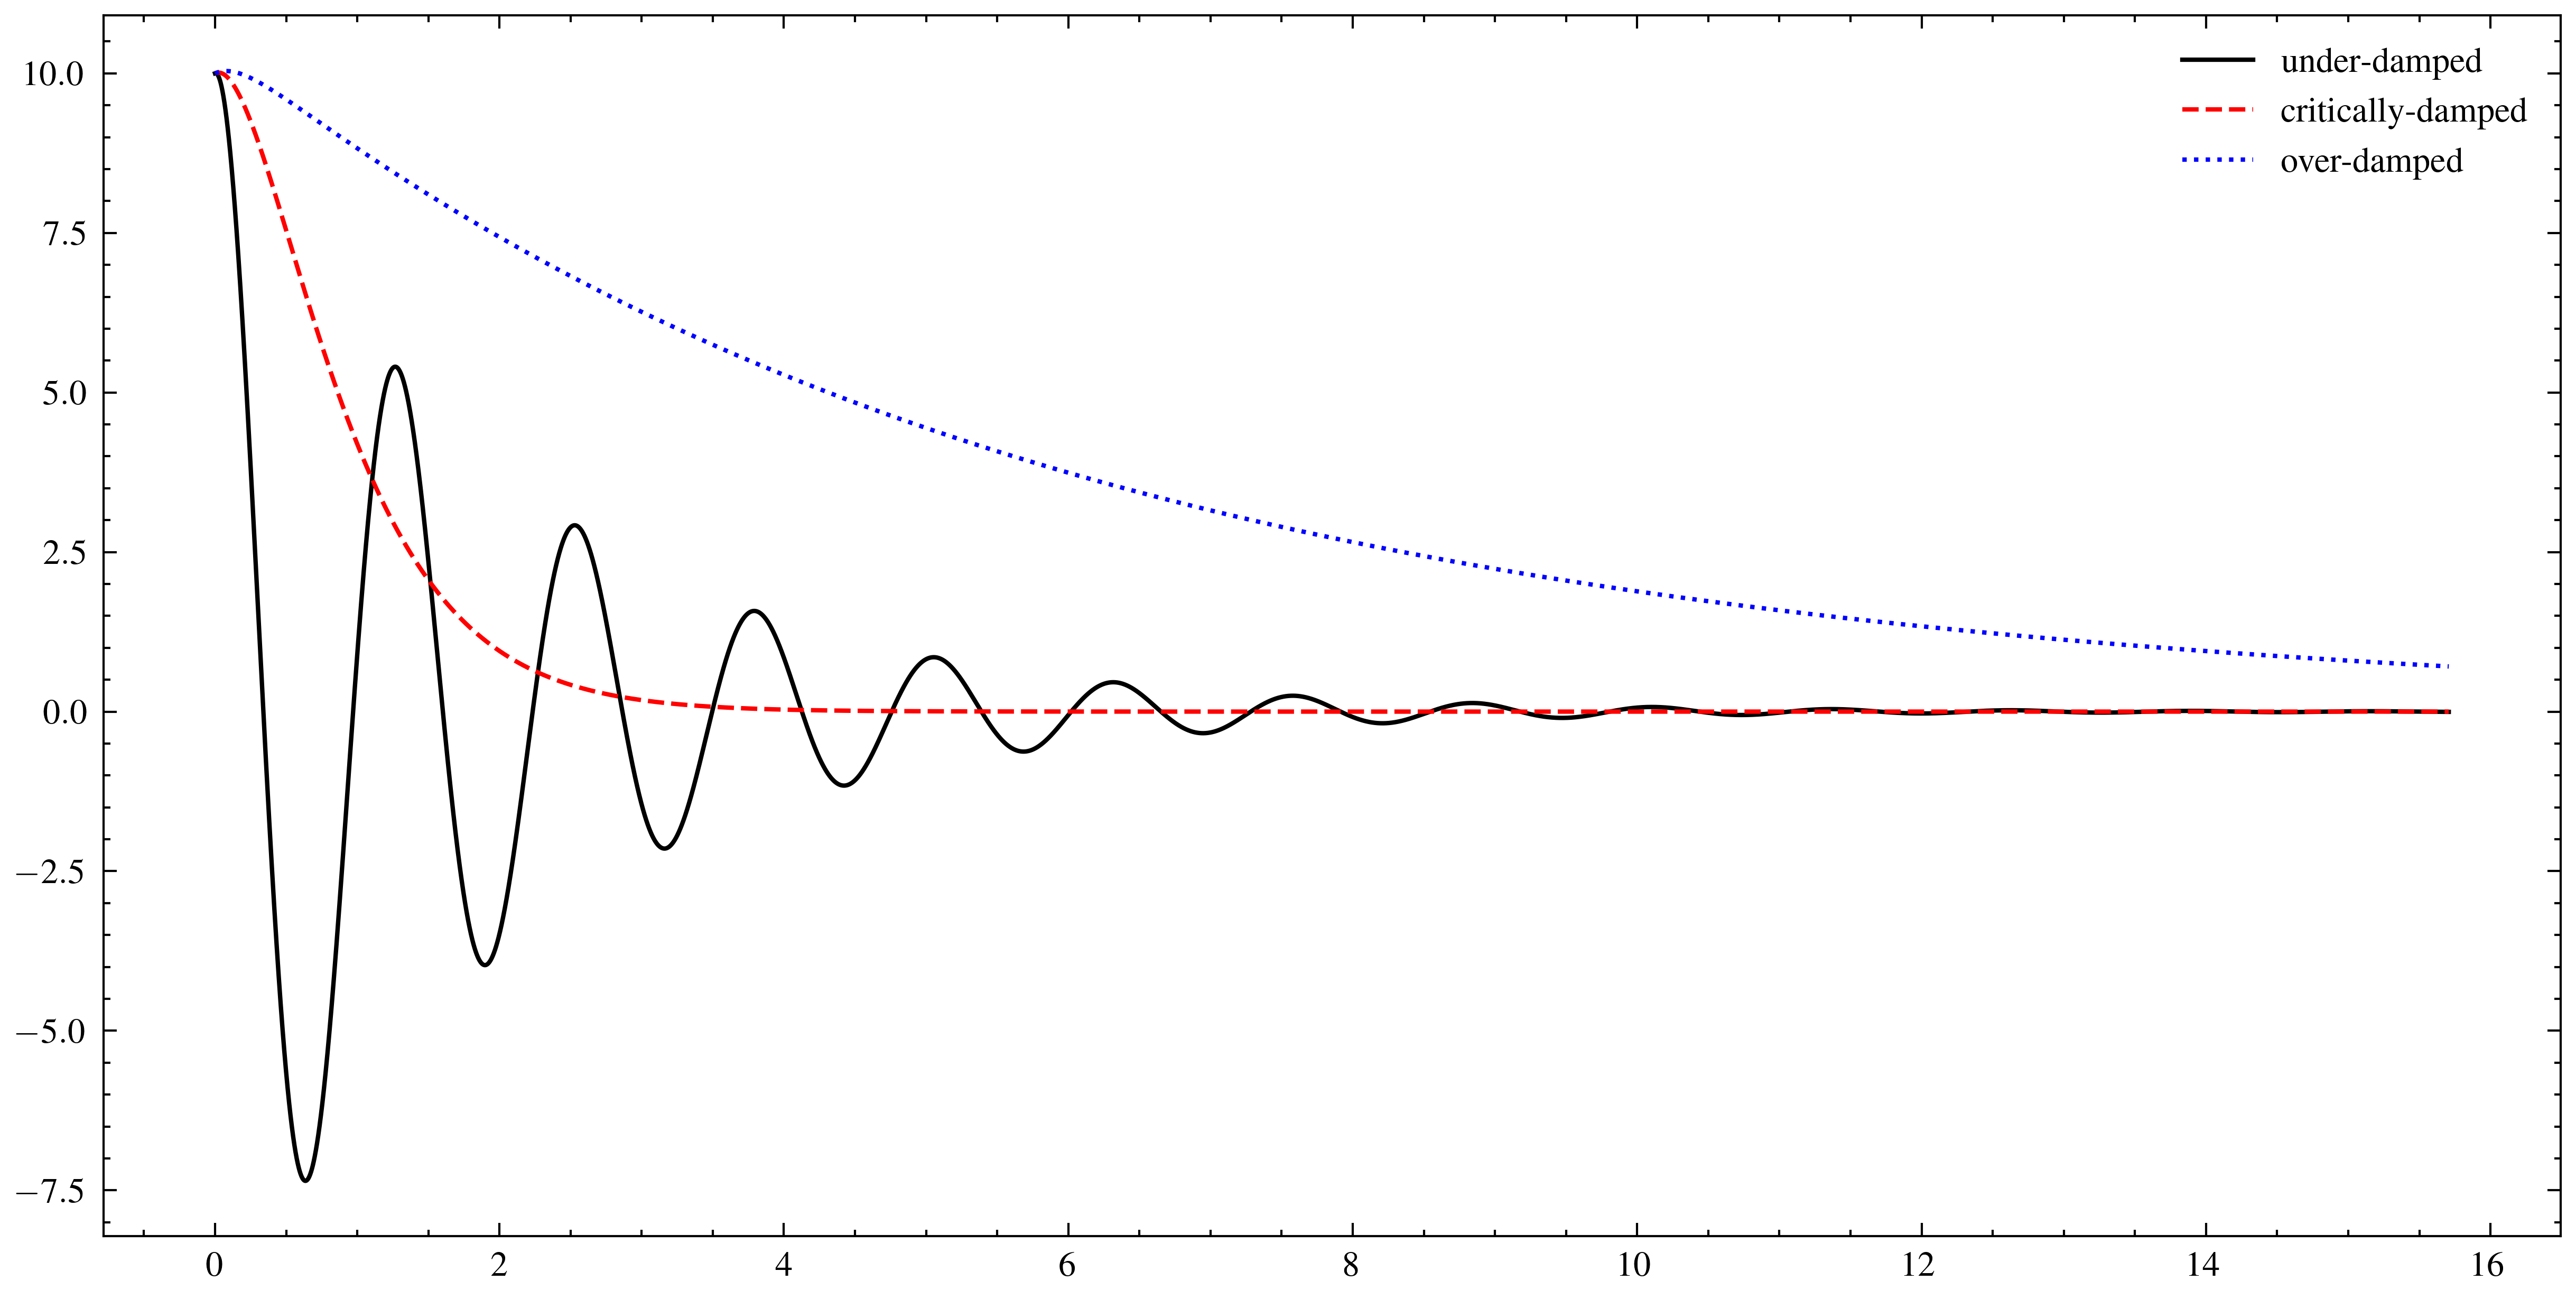

In [22]:
plt.plot(points, y_under, label="under-damped")
plt.plot(points, y_critical, label="critically-damped")
plt.plot(points, y_over, label="over-damped")
plt.legend()
plt.show()


#### Forced harmonic oscillator

$$\;$$

For forced harmonic oscillator the quation of motion becomes,
$$\ddot x + \gamma \dot x + \omega^2 x = f_o sin(\alpha x)$$

where, $f_o$ is the apmlituted and $\alpha$ is the andgular frequency of the given force.


In [23]:
gamma = 3
omega = 1
f_0 = 5
alpha = 3


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y + f_0 * sin(alpha * x)


x_i = 0
x_f = 10 * pi
y_i = 1
y_prime_i = 0
h = 0.001


In [24]:
points = generate_points(x_i, x_f, h)

y_euler = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)


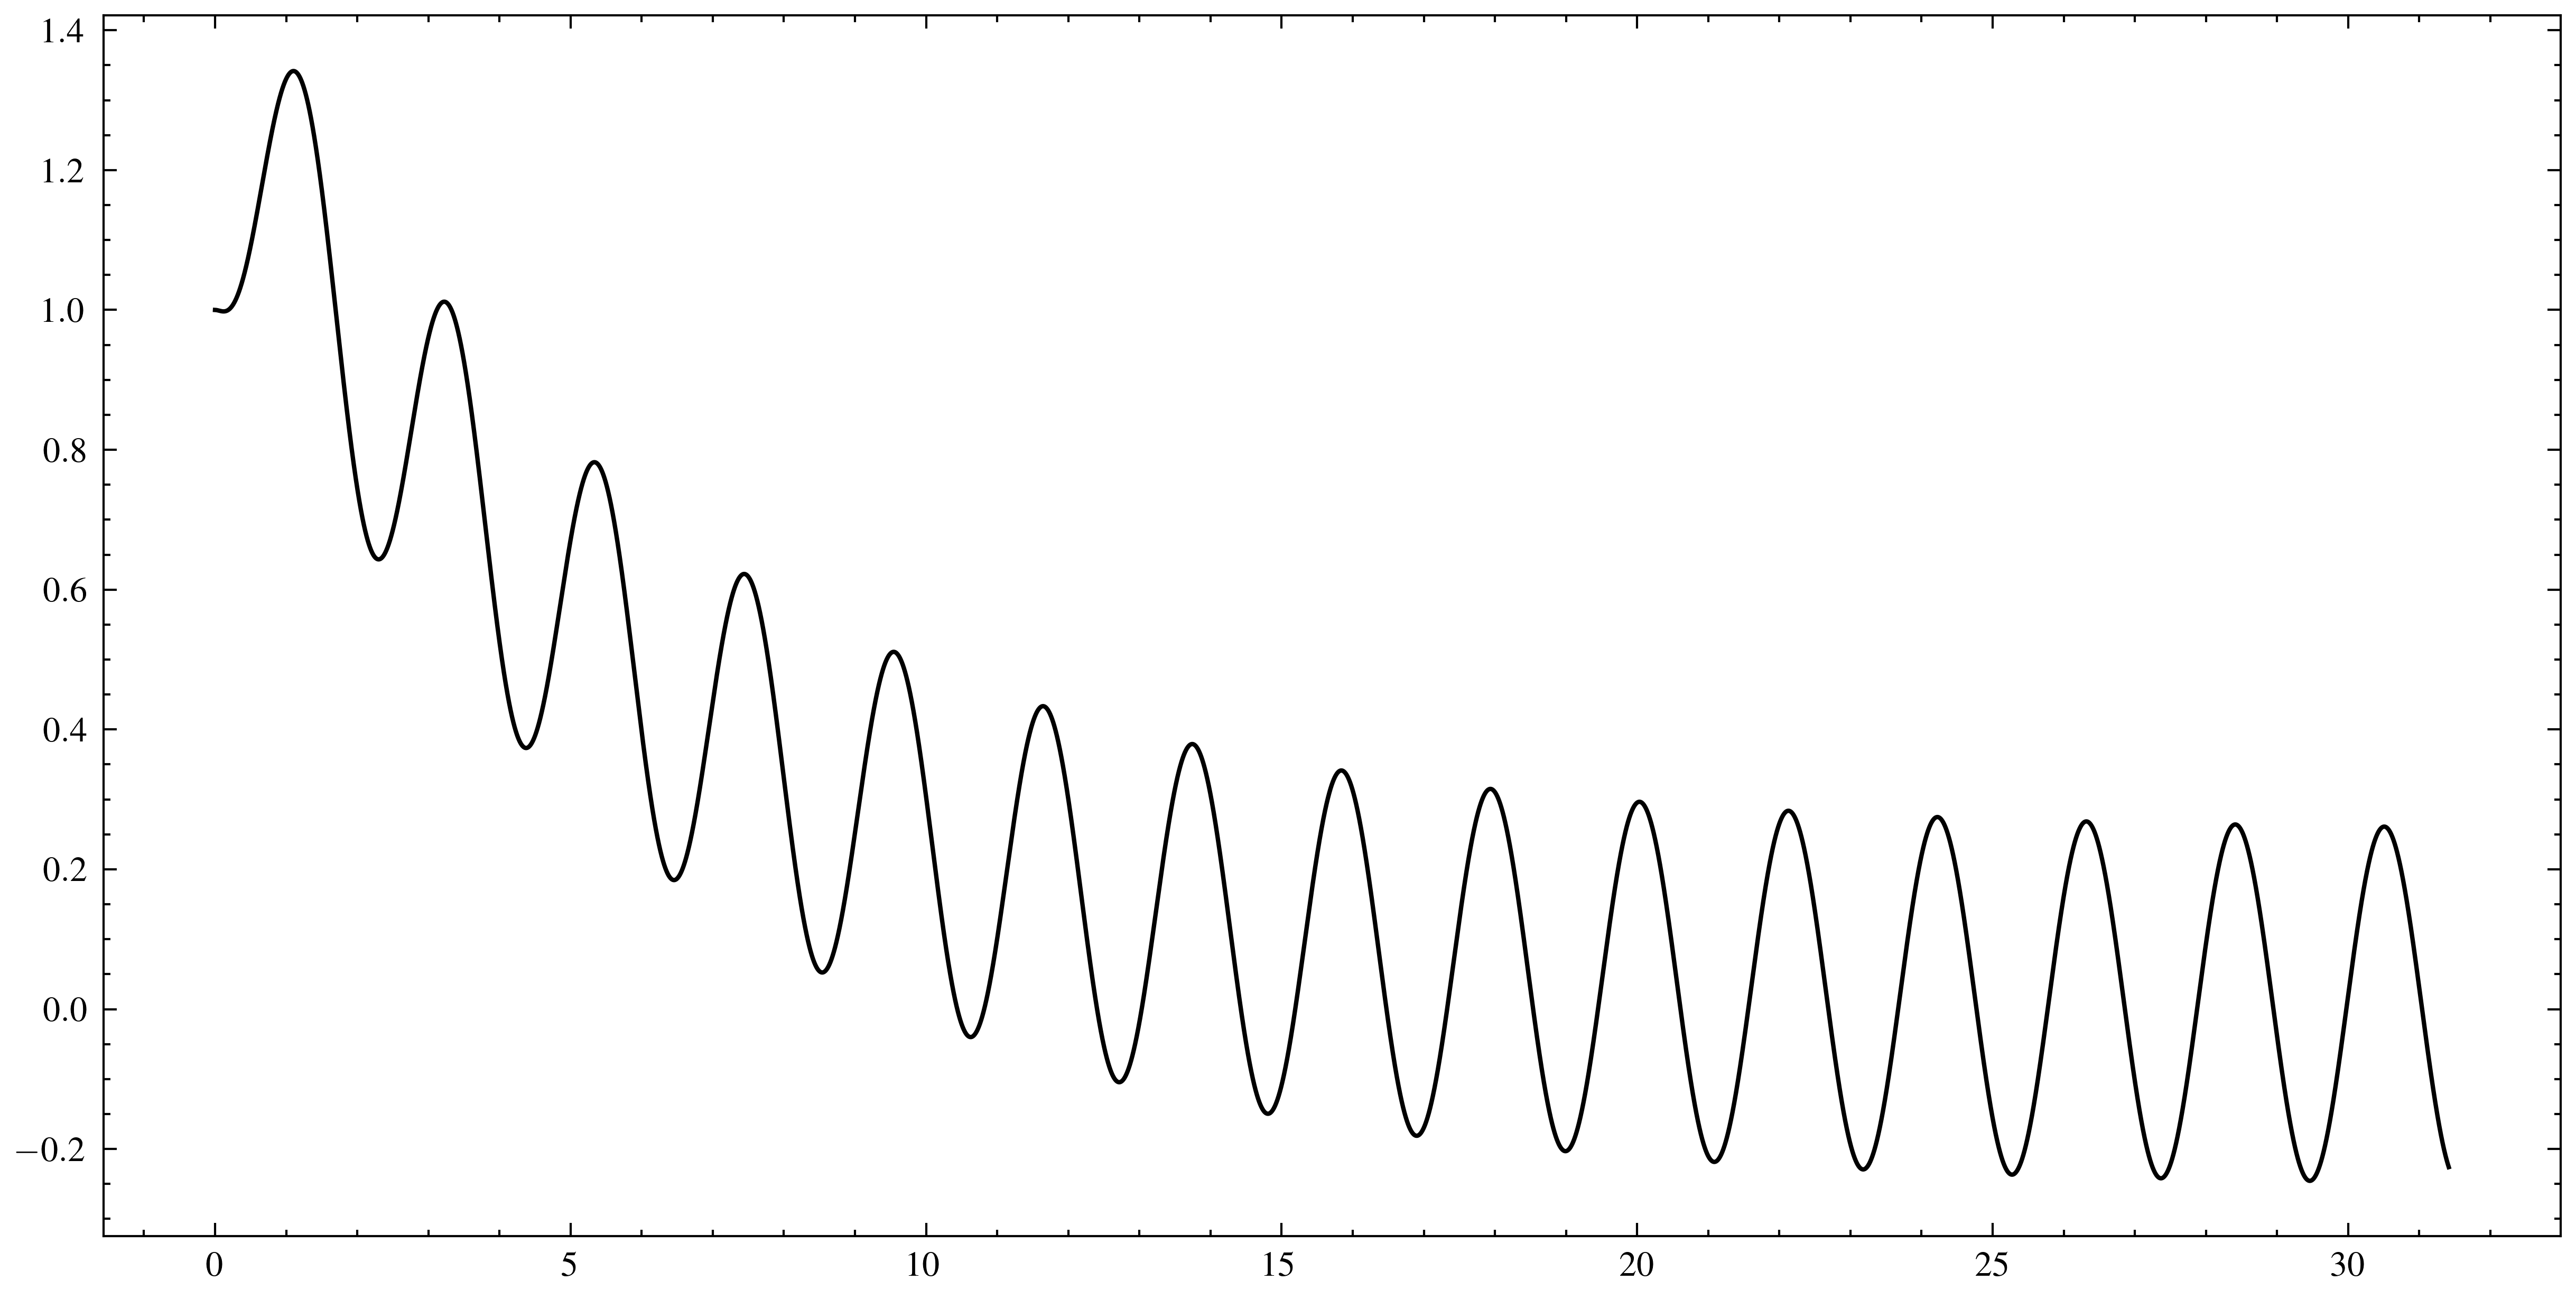

In [25]:
plt.plot(points, y_euler)
plt.show()


#### Undamped forced oscillator

For forced harmonic oscillator the quation of motion becomes,
$$\ddot x + \omega^2 x = f_o sin(\alpha x)$$


In [26]:
gamma = 0
omega = 2
f_0 = 2
alpha = 2


def y_prime_prime(x, y, y_prime):
    return - 2 * gamma * y_prime - omega**2 * y + f_0 * sin(alpha * x)


x_i = 0
x_f = 10 * pi
y_i = 0
y_prime_i = 0
h = 0.001


In [27]:
points = generate_points(x_i, x_f, h)

y_euler = solve_euler(y_prime_prime, x_i, x_f, y_i, y_prime_i, h)


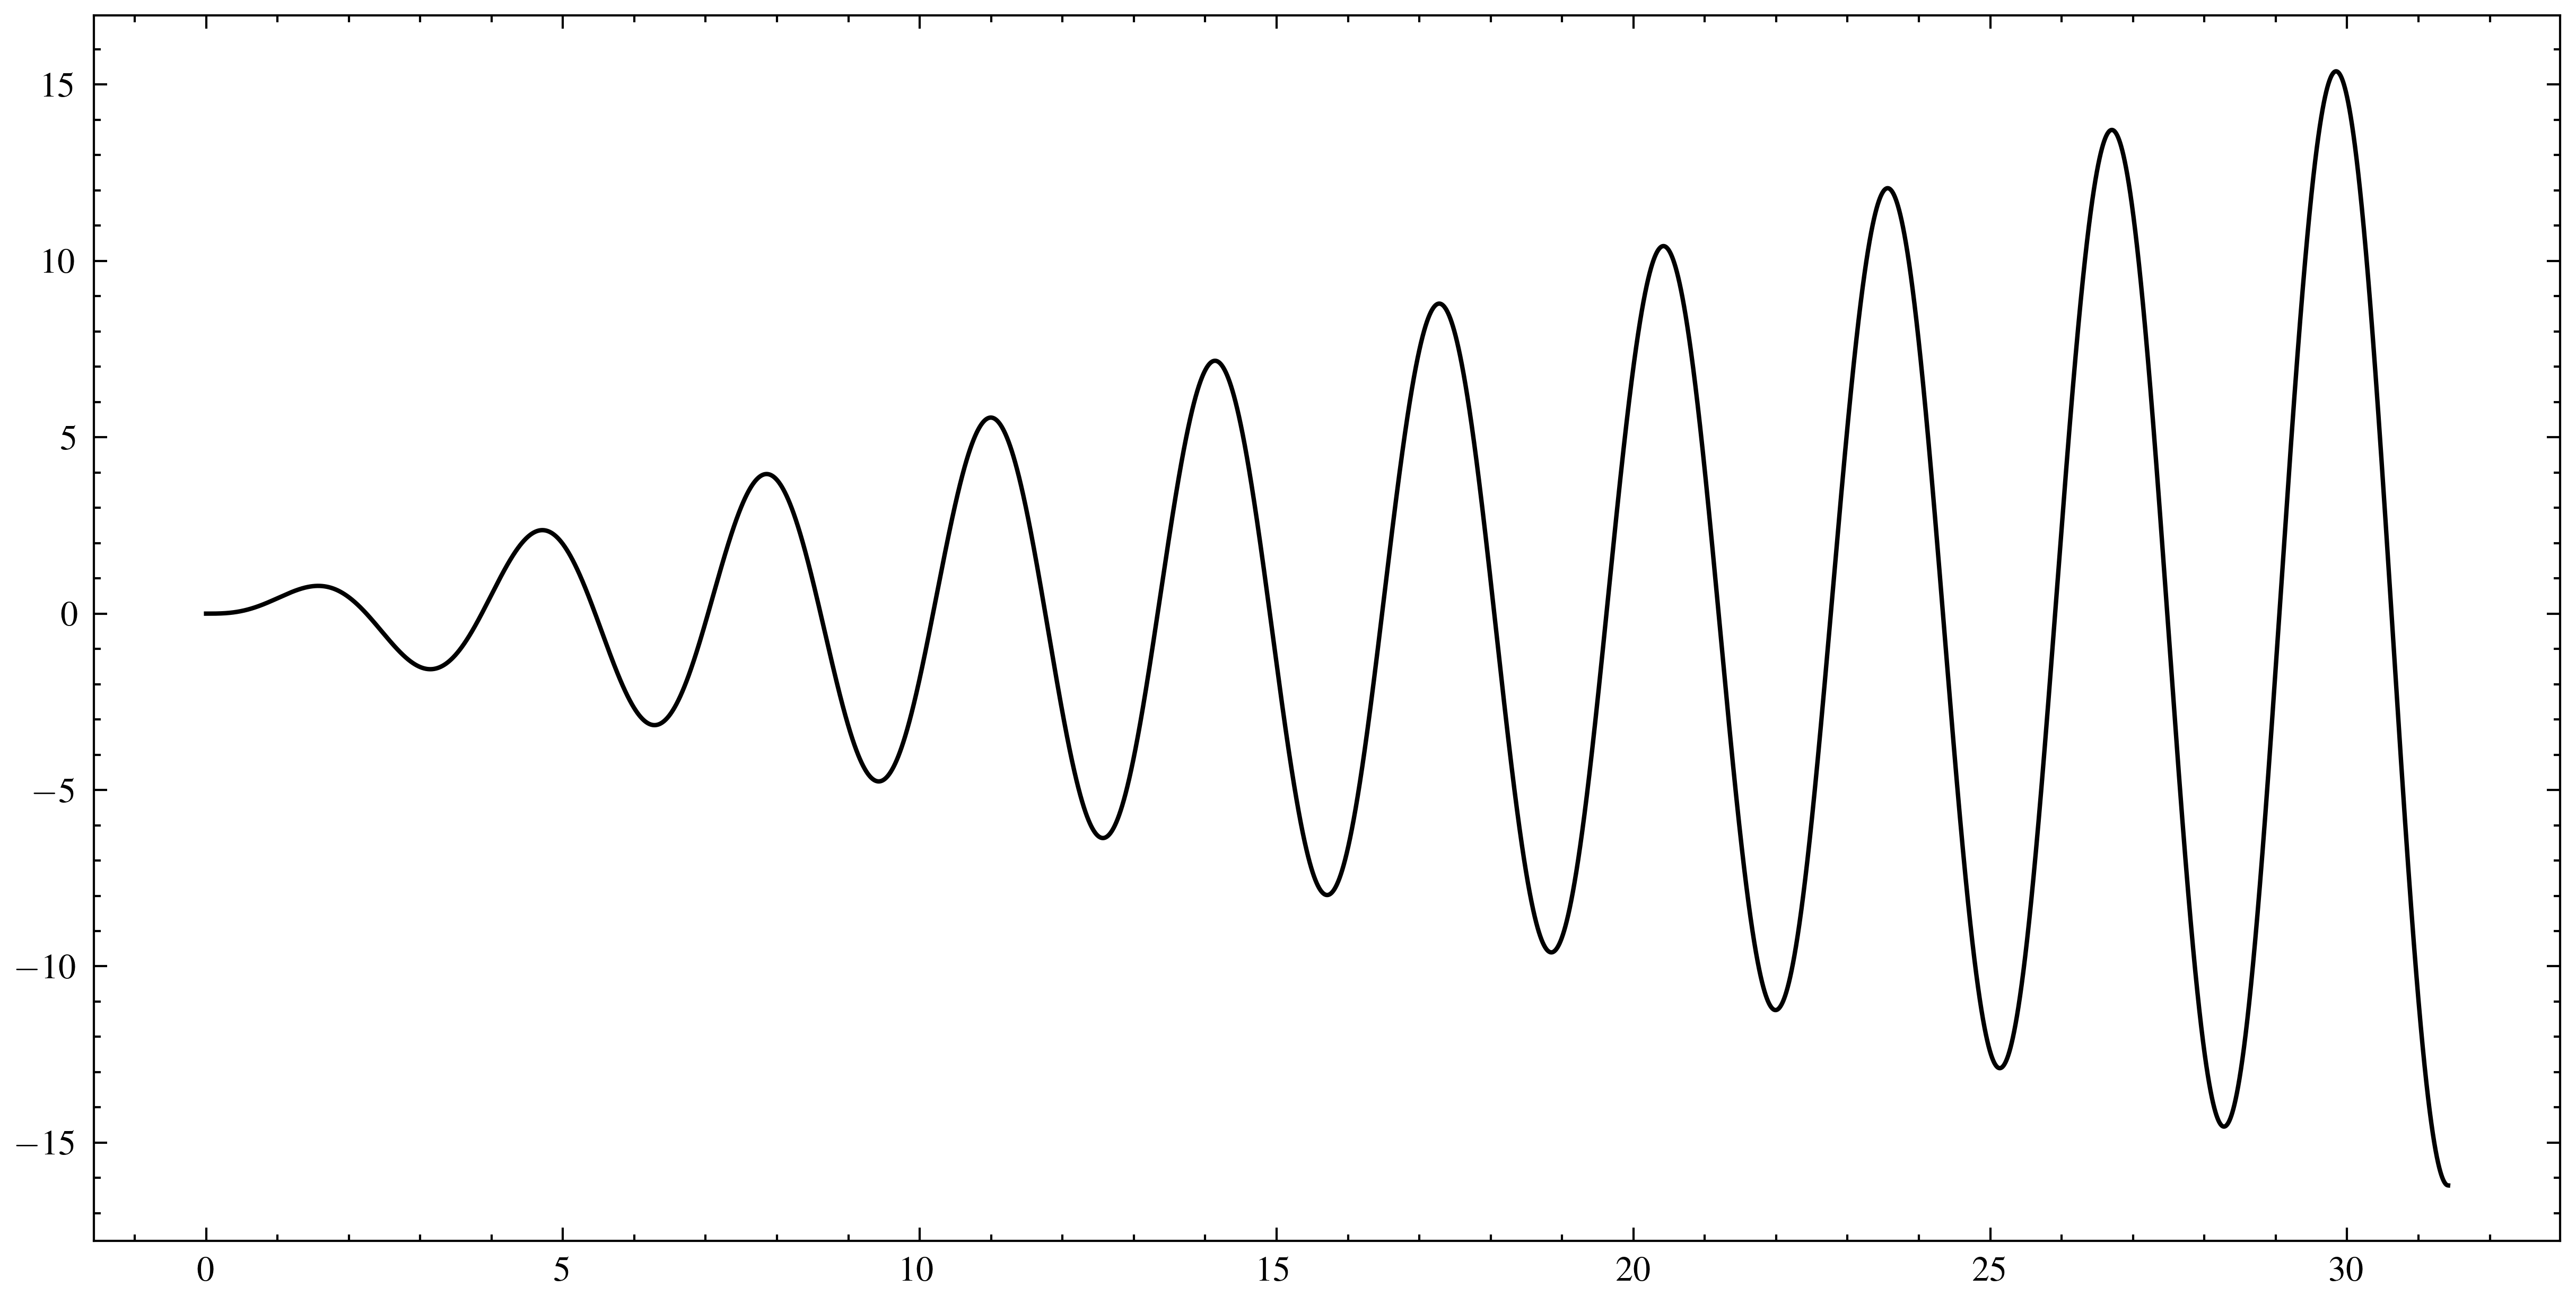

In [28]:
plt.plot(points, y_euler)
plt.show()
